## Lab5 - ML

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import warnings

In [3]:
data = pd.read_csv("Android_Malware.csv")
print(data)
data = data.drop(' Timestamp', axis=1)

C:\Users\year3\AppData\Local\Temp\ipykernel_13044\2203794831.py:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Android_Malware.csv")


        Unnamed: 0                                  Flow ID     Source IP  \
0                0    172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1                1    172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2                2    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3                3    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4                4    131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...            ...                                      ...           ...   
355625         405      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         406         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627         407  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628         408        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         409         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Source Port   Destination IP   Destination Port   Protocol  \
0   

In [4]:
print(data.columns.tolist())

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [5]:
print(data['Label'].value_counts())
names=sorted(data['Label'].unique().tolist())
print(names)

Android_Adware         147443
Android_Scareware      117082
Android_SMS_Malware     67397
Benign                  23708
Name: Label, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


In [6]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

data1 = labelencoder(data)
data1.dropna(axis=0, inplace=True)

missing_values = data1.isna().sum()
print(missing_values)

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
Idle Mean          0
 Idle Std          0
 Idle Max          0
 Idle Min          0
Label              0
Length: 85, dtype: int64


In [7]:
print(data1.dtypes)

Unnamed: 0           int64
Flow ID              int32
 Source IP           int32
 Source Port         int64
 Destination IP      int32
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Label                int32
Length: 85, dtype: object


In [8]:
data1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,133842,10,50004,1285,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,133816,10,35455,1285,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,111350,10,51775,649,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,111350,10,51775,649,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,111351,10,51776,649,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,135200,718,80,18,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
355626,406,72469,10,7632,16,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
355627,407,75843,10,45970,100,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,3
355628,408,65109,10,51982,16,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [9]:
print("Total Features : ",len(data1.columns)-1)

Total Features :  84


In [10]:
from sklearn.utils import resample

def balance_data(data, random_state=0):
    X = data.drop("Label", axis=1)
    y = data["Label"]
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()
    balanced_data = pd.DataFrame(columns=data.columns)

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

In [11]:
balanced_data = balance_data(data1)
balanced_class_counts = balanced_data["Label"].value_counts()
print(balanced_class_counts)

0    23708
2    23708
3    23708
1    23708
Name: Label, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)

In [13]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  284500
Train labels size :  284500
Test features size :  71126
Test features size :  71126


In [14]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (284500, 84)
Train labels :  (284500,)
Test Features :  (71126, 84)
Test labels :  (71126,)


<Axes: title={'center': 'Correlation Heatmap of the Dataset'}>

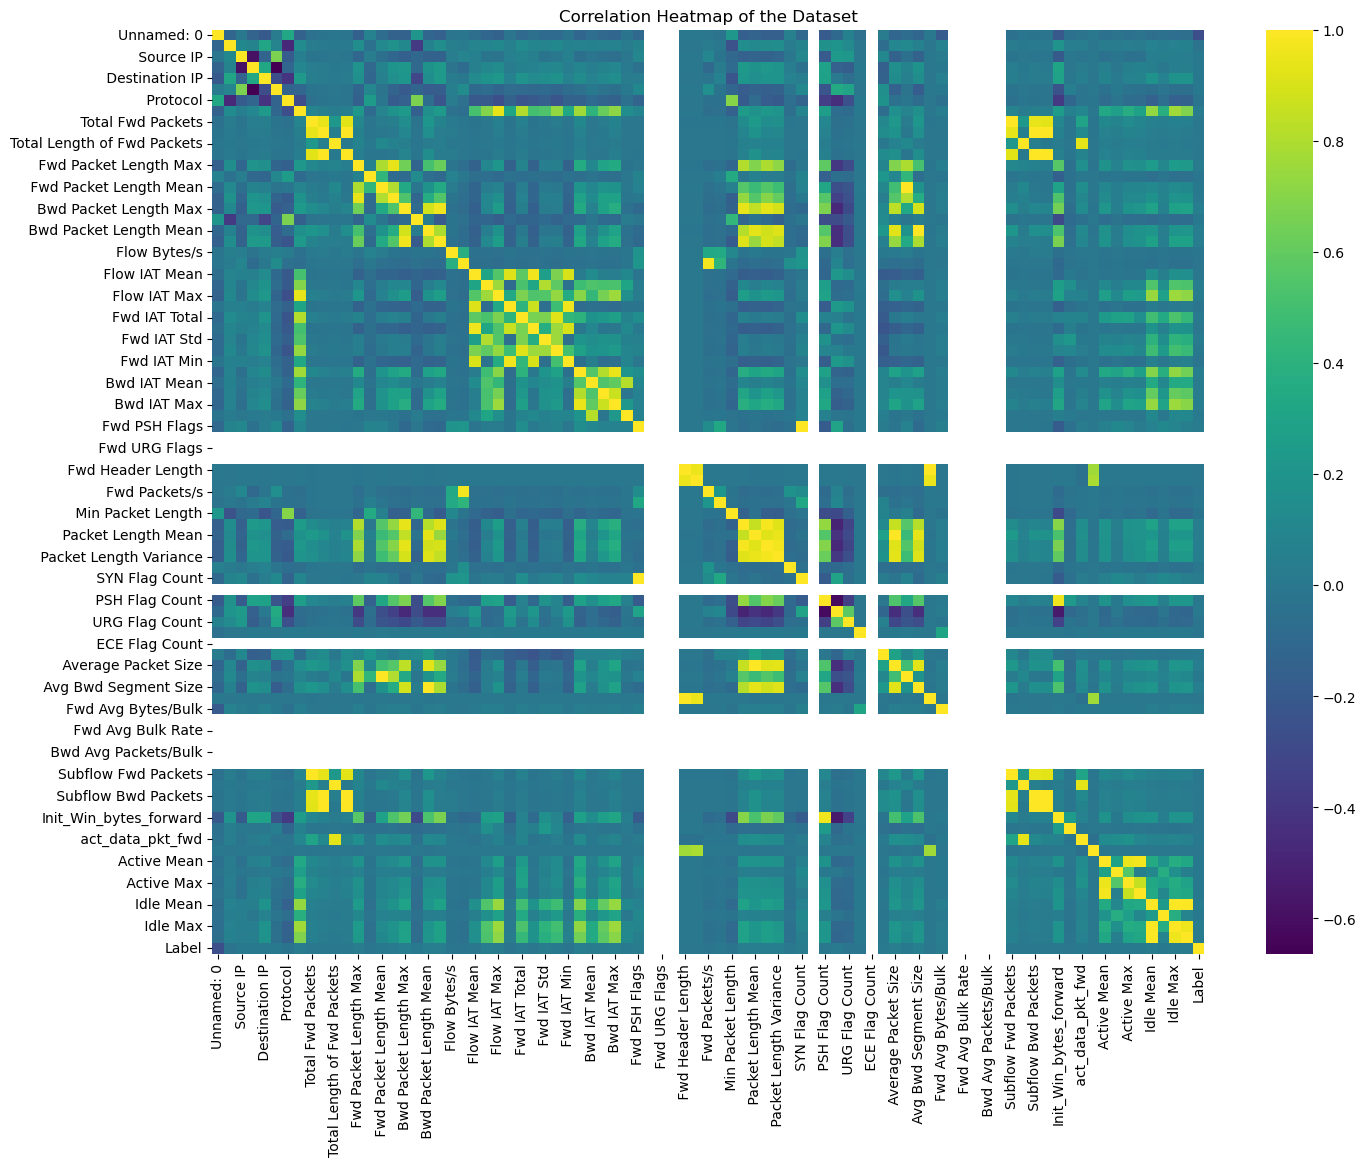

In [15]:
plt.figure(figsize=(16,12))
plt.title("Correlation Heatmap of the Dataset")
sns.heatmap(data.corr(), cmap="viridis", annot=False)

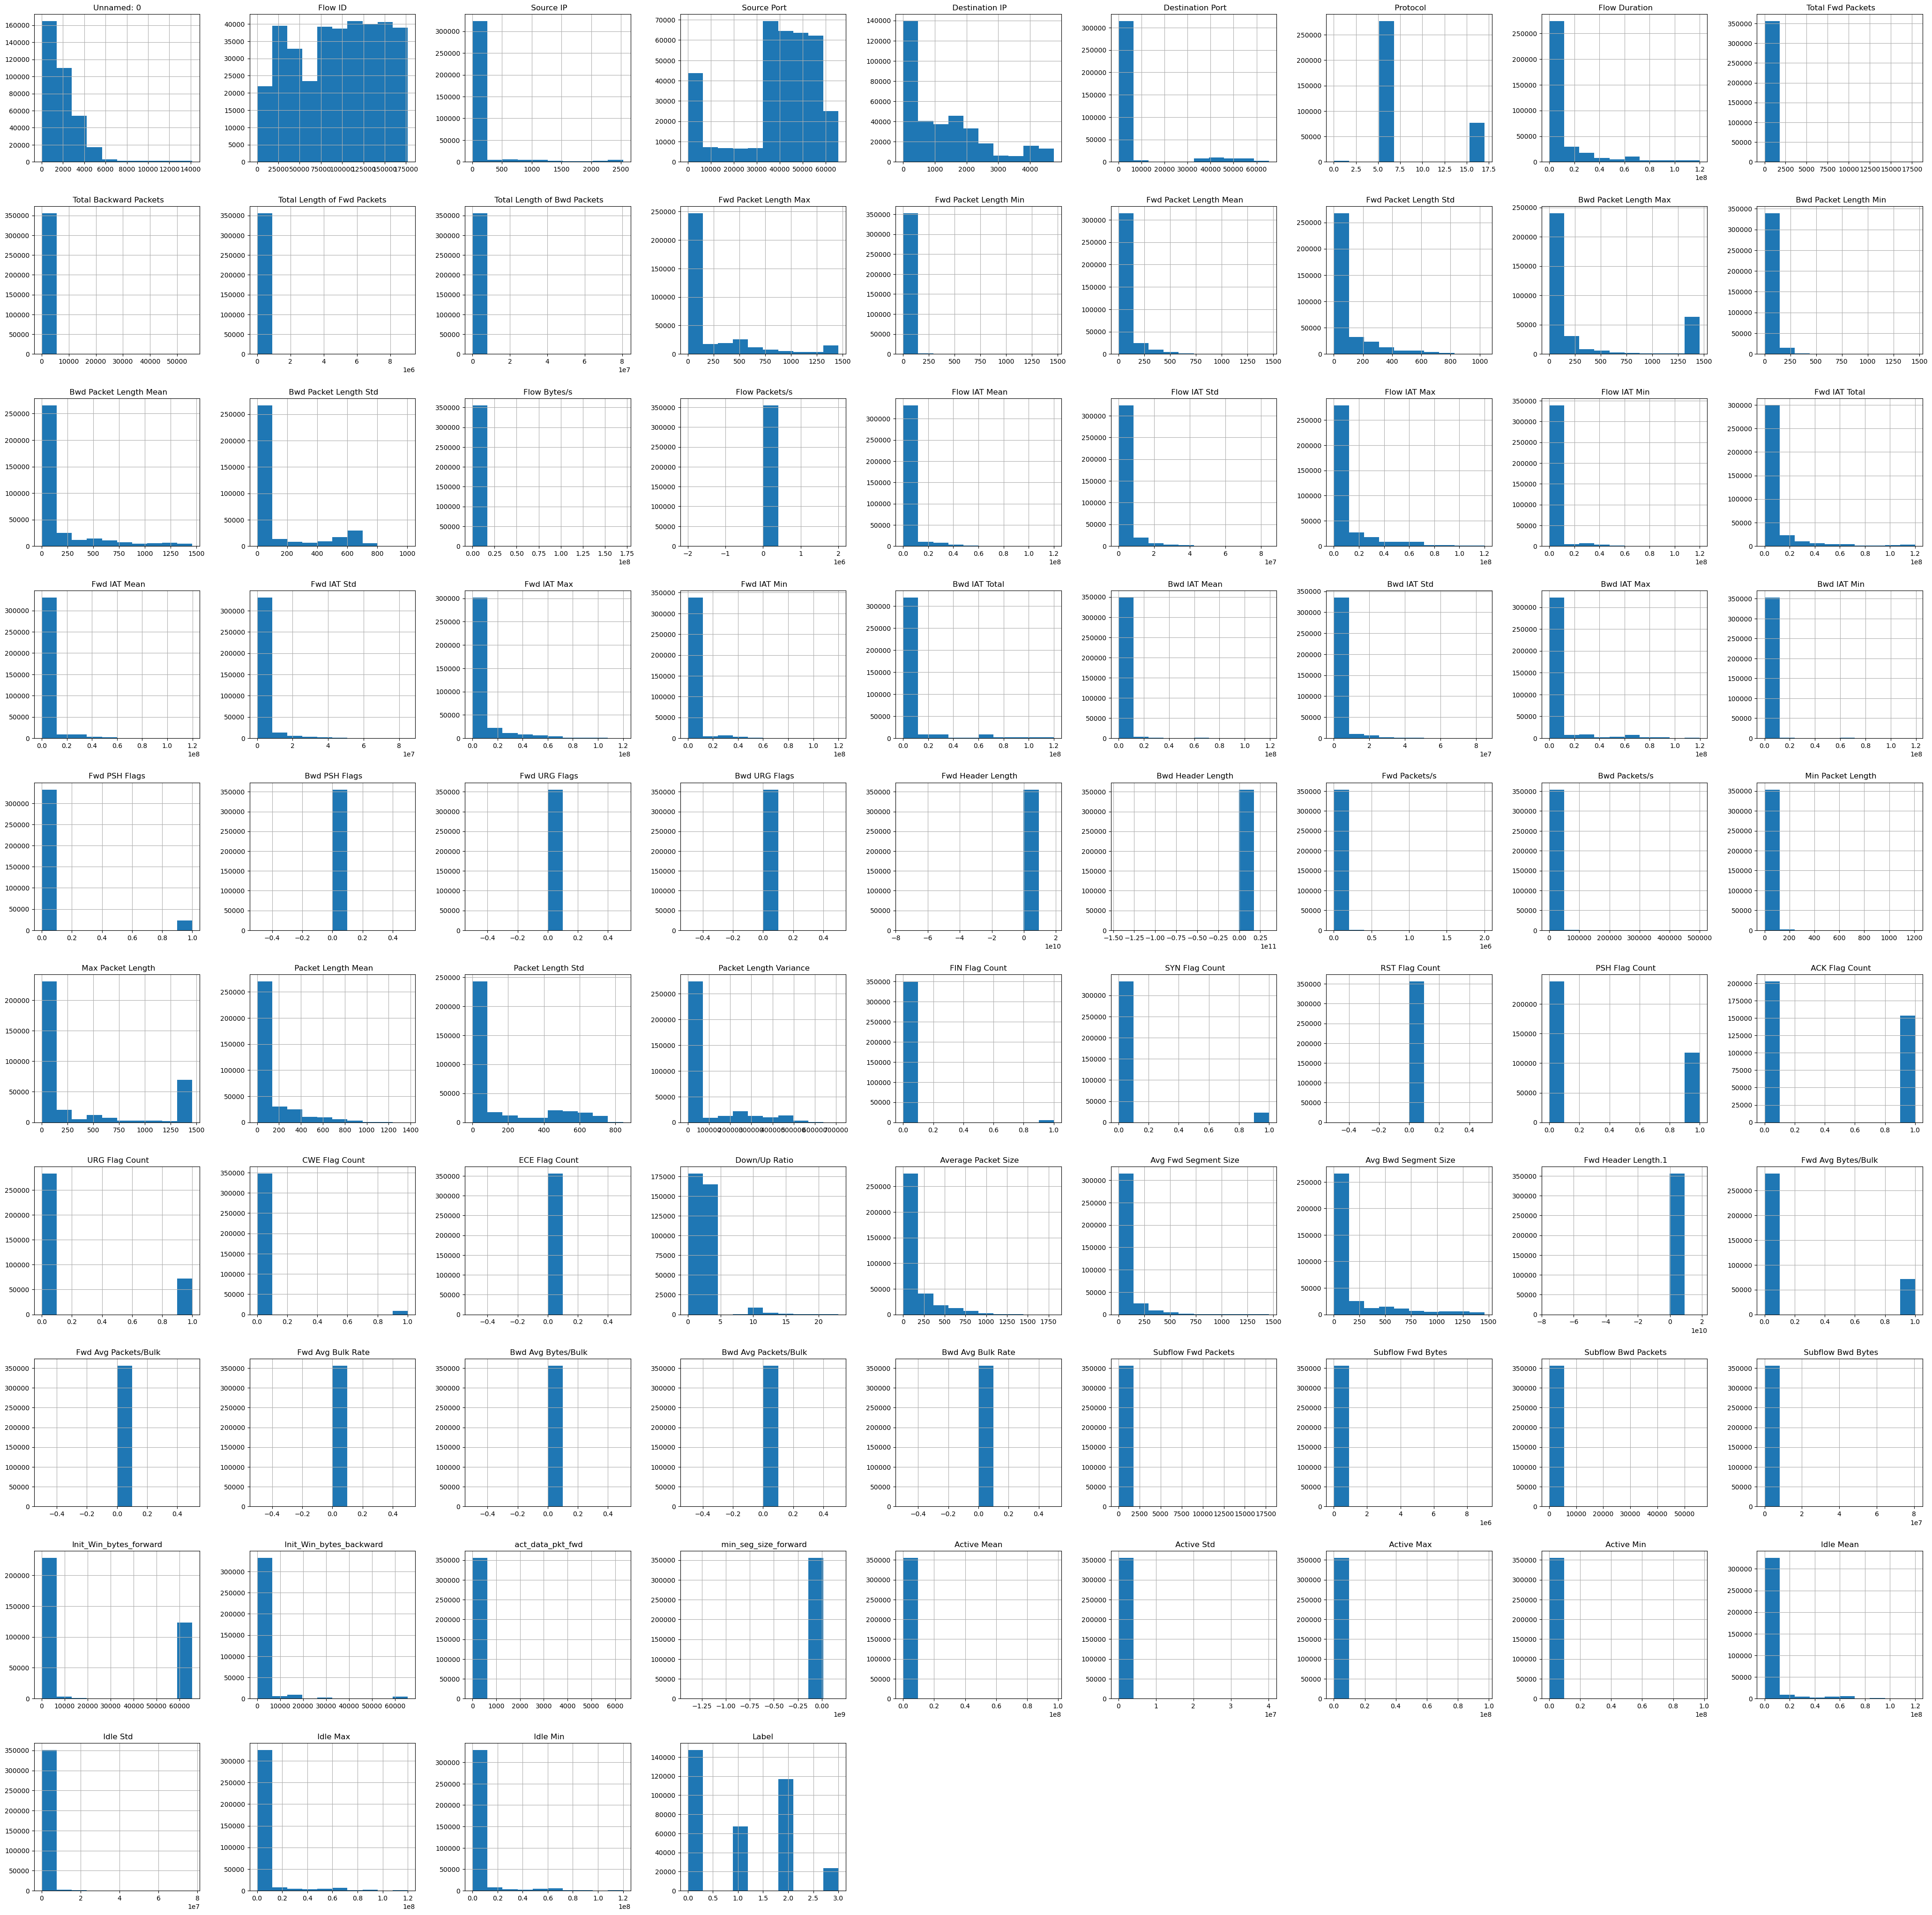

In [16]:
data1.hist(bins=10, figsize=(52,52))
plt.show()

In [17]:
X = data.drop('Label', axis=1)  # Features
y = data['Label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Importance:
Fwd Avg Bytes/Bulk: 0.25011660522504375
Unnamed: 0: 0.09411433662960286
Flow ID: 0.05471103427224103
 Source Port: 0.03679204511334521
 Destination IP: 0.03148490929273311
 Source IP: 0.029961452577372684
 Flow IAT Min: 0.026077227881499625
 Flow IAT Max: 0.025483822128440994
 Flow Duration: 0.024730228299878098
Fwd Packets/s: 0.024399653817483376
 Flow Packets/s: 0.024195757699421398
 Flow IAT Mean: 0.024157920051281617
 Fwd IAT Min: 0.01770279583329138
 Bwd Packets/s: 0.01649424107626786
Init_Win_bytes_forward: 0.01583222880550261
 Fwd IAT Max: 0.015352100158514115
Fwd IAT Total: 0.015113795676737691
 Fwd IAT Mean: 0.015054587025757482
 CWE Flag Count: 0.013051759263719953
Flow Bytes/s: 0.01240581045052289
 Destination Port: 0.012296194133111775
 Flow IAT Std: 0.009756145887760127
 Init_Win_bytes_backward: 0.009308473532546862
 Fwd IAT Std: 0.008510859596019833
 Average Packet Size: 0.007192464367800582
 Packet Length Std: 0.0071555306843934284
 Packet Length Mean

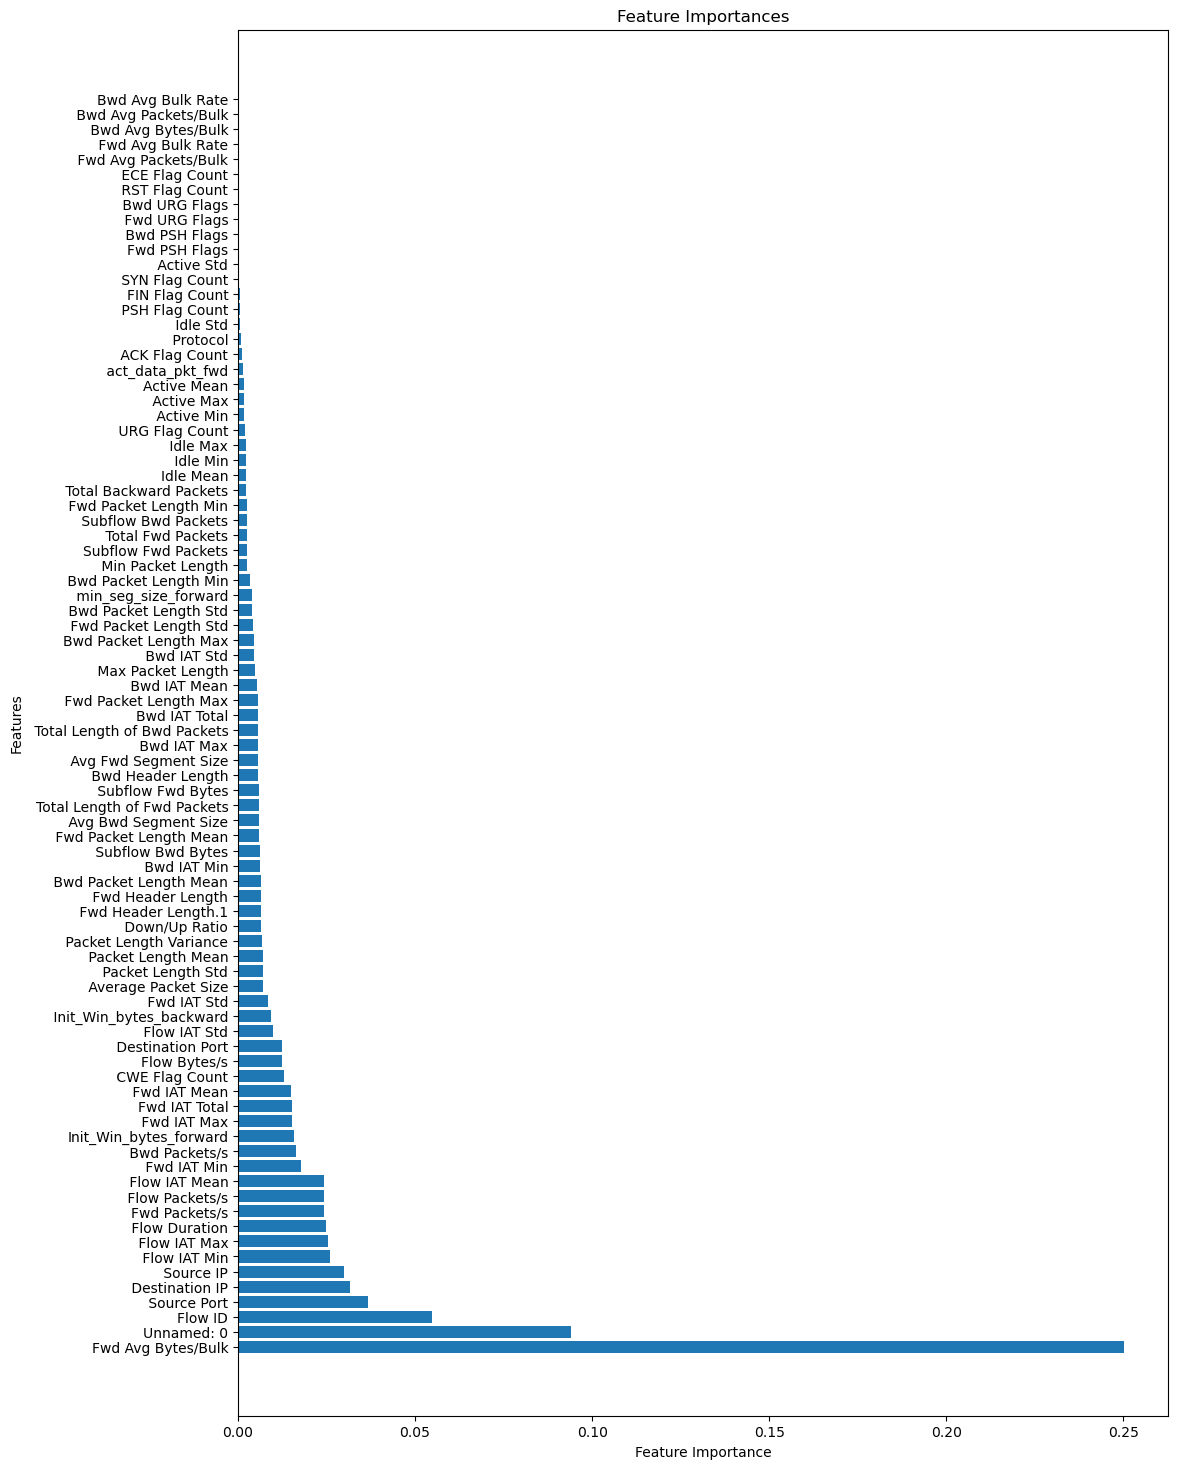

In [19]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
feature_importance = random_forest_model.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

features, importance = zip(*sorted_feature_importance)
plt.figure(figsize=(12, 18))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [20]:
# warnings.filterwarnings("ignore", category=ConvergenceWarning)
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# models = {
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'AdaBoost': AdaBoostClassifier(random_state=42),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Multi-layer Perceptron': MLPClassifier(random_state=42),
#     'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
#     'Logistic Regression': LogisticRegression(random_state=42),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Naive Bayes (Gaussian)': GaussianNB(),
# }

# for model_name, model in models.items():
#     print(f"\n{model_name} Model:")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     cm = confusion_matrix(y_test, y_pred)

#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Android_Adware(Predicted)', 'Android_Scareware(Predicted)','Android_SMS_Malware(Predicted)', 'Benign(Predicted)'], yticklabels=['Android_Adware(Actual)', 'Android_Scareware(Actual)','Android_SMS_Malware(Actual)', 'Benign(Actual)'])
#     plt.title(f"{model_name} - Confusion Matrix")
#     plt.show()

#     classification_rep = classification_report(y_test, y_pred)
#     print(f"{model_name} Classification Report:\n", classification_rep)

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 ... 0 0 0]
[[ 1.94417955e+03  9.47039777e+04  1.20583512e+02  3.91368780e+04
   1.23028213e+03  5.19748923e+03  8.33394143e+00  1.09378365e+07
   7.28208075e+00  1.03438011e+01  6.89920887e+02  1.10742961e+04
   2.11978499e+02  1.24988102e+01  5.95985893e+01  7.95005135e+01
   3.20842892e+02  2.30386372e+01  1.68757330e+02  1.23710597e+02
   8.36439314e+04  5.43666853e+03  3.17227528e+06  2.43134347e+06
   9.45827984e+06  2.05249801e+06  7.53711398e+06  3.20167300e+06
   1.93604333e+06  6.25158083e+06  2.07374284e+06  5.63606747e+06
   9.48872690e+05  1.41284310e+06  4.72120760e+06  3.42924067e+05
   6.55517007e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.65532131e+05  3.26243873e+05  4.63236804e+03  8.11330544e+02
   8.39493063e+00  3.74939865e+02  1.15246043e+02  1.45061776e+02
   7.15809143e+04  1.66014630e-02  6.55517007e-02  0.00000000e+00
   3.31579336e-01  4.30773341e-01  2.04300282e-01  2.31288643e-02
   0.00000000e+00  2.25966895e+00  1.27525048e+02  5.95985

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
silhouette_score(X_train, kmeans.labels_)
calinski_harabasz_score(X_train, kmeans.labels_)
davies_bouldin_score(X_train, kmeans.labels_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [40]:
!pip install yellowbrick  

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
distorsions = []
for k in range(2, 10):
 kmeans = KMeans(n_clusters=k).fit(X_train)
 distorsions.append(kmeans.inertia_)
print(distorsions)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(distorsions)
visualizer.show()

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'yellowbrick'